   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

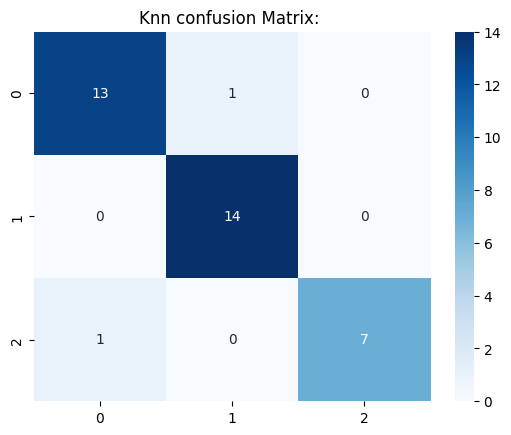

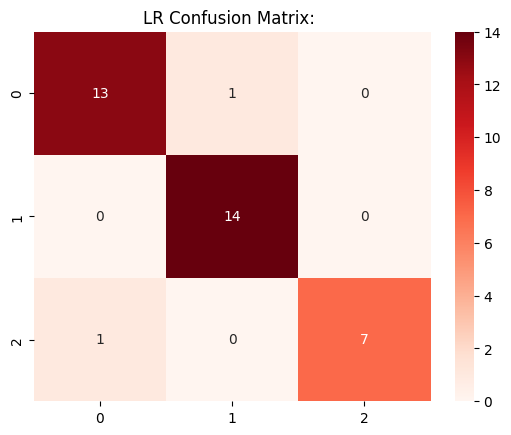

In [14]:
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"]= wine.target

print(df.head())

X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(" KNN Accuracy Score: ", accuracy_score(y_test, y_pred))

model= LogisticRegression(max_iter= 5000)
model.fit (X_train, y_train)
y_pred= model.predict(X_test)
print("LR Accuracy score: ", accuracy_score(y_test, y_pred))

tree_model= DecisionTreeClassifier(random_state= 42)
tree_model.fit(X_train, y_train)
y_pred= tree_model.predict(X_test)
print(" Tree Accuracy score: ", accuracy_score(y_test, y_pred))

cm_knn= confusion_matrix(y_test, y_pred)
sns.heatmap(cm_knn, annot=True, fmt ="d", cmap="Blues")
plt.title("Knn confusion Matrix: ")
plt.show()

cm_LR= confusion_matrix(y_test, y_pred)
sns.heatmap(cm_LR, annot= True, fmt="d", cmap="Reds")
plt.title("LR Confusion Matrix: ")
plt.show()

